### Michael Hotaling <br> DSC540: Term Project <br>12/24/2020

## Milestone 4 (Weeks 9 & 10)
### Fundamental Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import simfin as sf
import missingno as mn

### API Key

SimFin requires a paid subscription to access most of their information. We can load in our key use the SimFin API to connect

In [2]:
with open("apikey.txt") as f:
    key = f.readline()
sf.set_api_key(api_key=key)

In [3]:
# Setting a directory to save our data
sf.set_data_dir('~/simfin_data/')

We can use the API to directly download the most up to date data for each company in our list. We have access to income sheets, balance sheets, cashflow statements, and some calculated derivatives.

We can merge all those dataframes together since we will want to perform calculations on them. We can merge them by using the ticker, year, and quarter as index values since there should only be one per each entry.

In [4]:
def pull_data(variant="quarterly"):
    """Pulls the income sheet, balanace sheet, cash flow statement and some derivatives for all US based companies"""
    merge_columns = ['Ticker','Fiscal Year', 'Fiscal Period']
    income = sf.load(dataset='income', variant=variant, market='us',refresh_days=5)
    balance = sf.load(dataset='balance', variant=variant, market='us',refresh_days=5)
    cashflow = sf.load(dataset='cashflow', variant=variant, market='us',refresh_days=5)
    derivatives = sf.load(dataset='derived', variant=variant, market='us',refresh_days=5)
    if variant != 'quarterly':
        merge_columns.pop(-1)
    df = income.merge(balance, on =(merge_columns), suffixes=('', '_y'))
    df = df.merge(cashflow, on =(merge_columns), suffixes=('', '_y'))
    df = df.merge(derivatives, on =(merge_columns), suffixes=('', '_y'))
    df.drop(df.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

    df['Report Date']=pd.to_datetime(df['Report Date'])
    df['Publish Date']=pd.to_datetime(df['Publish Date'])
    df['Restated Date']=pd.to_datetime(df['Restated Date'])
    return df

In [5]:
quarterly_data = pull_data(variant="quarterly")
annual_data = pull_data(variant="annual")

Dataset "us-income-quarterly" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-balance-quarterly" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-quarterly" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-derived-quarterly" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-income-annual" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-balance-annual" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-annual" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-derived-annual" on disk (0 days old).
- Loading from disk ... Done!


In [6]:
annual_data

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Current Ratio,Liabilities to Equity Ratio,Debt Ratio,"Earnings Per Share, Basic","Earnings Per Share, Diluted",Sales Per Share,Equity Per Share,Free Cash Flow Per Share,Dividends Per Share,Pietroski F-Score
0,A,45846,USD,2008,FY,2008-10-31,2008-12-19,2010-12-20,363000000.0,371000000.0,...,2.39248,1.73818,0.30327,1.90909,1.86792,15.90634,7.04959,2.20110,NaN,NaN
1,A,45846,USD,2009,FY,2009-10-31,2009-12-21,2011-12-16,346000000.0,346000000.0,...,3.52716,2.02784,0.38163,-0.08960,-0.08960,12.95087,7.24277,0.52601,NaN,NaN
2,A,45846,USD,2010,FY,2010-10-31,2010-12-20,2012-12-20,347000000.0,353000000.0,...,2.00097,1.99629,0.38067,1.97118,1.93768,15.68876,9.30259,1.75793,0.00000,7.0
3,A,45846,USD,2011,FY,2011-10-31,2011-12-16,2013-12-19,347000000.0,355000000.0,...,3.03157,1.09847,0.24125,2.91643,2.85070,19.06340,12.41499,2.73775,0.00000,7.0
4,A,45846,USD,2012,FY,2012-10-31,2012-12-20,2014-12-22,348000000.0,353000000.0,...,2.44532,1.03202,0.22418,3.31322,3.26629,19.70690,14.89080,2.70115,0.29885,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20013,ZYXI,171401,USD,2015,FY,2015-12-31,2016-03-31,2017-04-17,31271234.0,31271234.0,...,0.36689,-1.90789,0.08793,-0.09309,-0.09309,0.37226,-0.12734,NaN,NaN,5.0
20014,ZYXI,171401,USD,2016,FY,2016-12-31,2017-04-18,2018-02-28,31271234.0,31271234.0,...,0.44183,-2.07601,0.06209,0.00221,0.00221,0.42573,-0.11874,NaN,NaN,8.0
20015,ZYXI,171401,USD,2017,FY,2017-12-31,2018-02-28,2018-02-28,32156000.0,33196000.0,...,2.08493,0.82150,0.03965,0.22904,0.22186,0.72870,0.15521,NaN,NaN,8.0
20016,ZYXI,171401,USD,2018,FY,2018-12-31,2019-02-26,2019-02-26,32503000.0,34043000.0,...,2.05127,1.07201,0.15412,0.29388,0.28059,0.98197,0.28859,NaN,NaN,3.0


In [7]:
quarterly_data

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Current Ratio,Liabilities to Equity Ratio,Debt Ratio,"Earnings Per Share, Basic","Earnings Per Share, Diluted",Sales Per Share,Equity Per Share,Free Cash Flow Per Share,Dividends Per Share,Pietroski F-Score
0,A,45846,USD,2010,Q3,2010-07-31,2010-10-06,2011-09-07,347000000.0,352000000.0,...,1.96606,2.23843,0.40418,0.59078,0.58239,3.98847,8.07493,0.50144,NaN,NaN
1,A,45846,USD,2010,Q4,2010-10-31,2010-12-20,2012-12-20,344000000.0,356000000.0,...,2.00097,1.99629,0.38067,0.84884,0.82022,4.58140,9.38372,0.75000,0.00000,6.0
2,A,45846,USD,2011,Q1,2011-01-31,2011-03-09,2012-03-05,347000000.0,355000000.0,...,3.27027,1.40910,0.26591,0.55620,0.54366,4.37752,9.60231,0.18732,NaN,NaN
3,A,45846,USD,2011,Q2,2011-04-30,2011-06-07,2012-06-04,347000000.0,355000000.0,...,3.20101,1.18354,0.24789,0.57637,0.56338,4.83285,11.39193,1.13256,0.00000,NaN
4,A,45846,USD,2011,Q3,2011-07-31,2011-09-07,2012-09-05,348000000.0,357000000.0,...,3.47043,1.08405,0.24769,0.94828,0.92437,4.85920,12.04598,0.21264,0.00000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70245,ZYXI,171401,USD,2019,Q3,2019-09-30,2019-10-29,2019-10-29,32490000.0,34076000.0,...,4.12436,0.50830,0.00000,0.06251,0.05960,0.36371,0.50726,NaN,0.00009,4.0
70246,ZYXI,171401,USD,2019,Q4,2019-12-31,2020-02-27,2020-02-27,32707000.0,34102000.0,...,4.34212,0.43881,0.00000,0.09016,0.08648,0.43300,0.60360,NaN,0.00000,4.0
70247,ZYXI,171401,USD,2020,Q1,2020-03-31,2020-04-28,2020-04-28,32913000.0,34204000.0,...,4.40487,0.42535,0.00000,0.08924,0.08587,0.46267,0.71087,NaN,0.00000,4.0
70248,ZYXI,171401,USD,2020,Q2,2020-06-30,2020-07-28,2020-07-28,33283000.0,34454000.0,...,4.95565,0.36362,0.00000,0.09065,0.08757,0.57876,0.81261,NaN,0.00000,4.0


For convenience, we can set the index for the dataframe

In [8]:
quarterly_data_indexed = quarterly_data.set_index(['Ticker','Fiscal Year','Fiscal Period'])
quarterly_data_indexed

SimFinId Currency Report Date Publish Date  \
Ticker Fiscal Year Fiscal Period                                               
A      2010        Q3                45846      USD  2010-07-31   2010-10-06   
                   Q4                45846      USD  2010-10-31   2010-12-20   
       2011        Q1                45846      USD  2011-01-31   2011-03-09   
                   Q2                45846      USD  2011-04-30   2011-06-07   
                   Q3                45846      USD  2011-07-31   2011-09-07   
...                                    ...      ...         ...          ...   
ZYXI   2019        Q3               171401      USD  2019-09-30   2019-10-29   
                   Q4               171401      USD  2019-12-31   2020-02-27   
       2020        Q1               171401      USD  2020-03-31   2020-04-28   
                   Q2               171401      USD  2020-06-30   2020-07-28   
                   Q3               171401      USD  2020-09-30   2020-10-27   

                                 Restated Date  Shares (Basic)  \
Ticker Fiscal Year Fiscal Period                                 
A      2010        Q3               2011-09-07     347000000.0   
                   Q4               2012-12-20     344000000.0   
       2011        Q1               2012-03-05     347000000.0   
                   Q2               2012-06-04     347000000.0   
                   Q3               2012-09-05     348000000.0   
...                                        ...             ...   
ZYXI   2019        Q3               2019-10-29      32490000.0   
                   Q4               2020-02-27      32707000.0   
       2020        Q1               2020-04-28      32913000.0   
                   Q2               2020-07-28      33283000.0   
                   Q3               2020-10-27      34486000.0   

                                  Shares (Diluted)       Revenue  \
Ticker Fiscal Year Fiscal Period                                   
A      2010        Q3                  352000000.0  1.384000e+09   
                   Q4                  356000000.0  1.576000e+09   
       2011        Q1                  355000000.0  1.519000e+09   
                   Q2                  355000000.0  1.677000e+09   
                   Q3                  357000000.0  1.691000e+09   
...                                            ...           ...   
ZYXI   2019        Q3                   34076000.0  1.181700e+07   
                   Q4                   34102000.0  1.416200e+07   
       2020        Q1                   34204000.0  1.522800e+07   
                   Q2                   34454000.0  1.926300e+07   
                   Q3                   35476000.0  2.002600e+07   

                                  Cost of Revenue  Gross Profit  ...  \
Ticker Fiscal Year Fiscal Period                                 ...   
A      2010        Q3                -659000000.0   725000000.0  ...   
                   Q4                -742000000.0   834000000.0  ...   
       2011        Q1                -703000000.0   816000000.0  ...   
                   Q2                -777000000.0   900000000.0  ...   
                   Q3                -799000000.0   892000000.0  ...   
...                                           ...           ...  ...   
ZYXI   2019        Q3                  -2261000.0     9556000.0  ...   
                   Q4                  -2821000.0    11341000.0  ...   
       2020        Q1                  -3401000.0    11827000.0  ...   
                   Q2                  -4061000.0    15202000.0  ...   
                   Q3                  -4296000.0    15730000.0  ...   

                                  Current Ratio  Liabilities to Equity Ratio  \
Ticker Fiscal Year Fiscal Period                                               
A      2010        Q3                   1.96606                      2.23843   
                   Q4                   2.00097                      1.9

We can now quickly pull each companies information using loc. We can also transpose the data to create a GAAP-like dataframe

In [9]:
quarterly_data_indexed.loc['AMD'].T.tail(74).head(10)

Fiscal Year                             2010                             2011  \
Fiscal Period                             Q2         Q3         Q4         Q1   
Revenue                            1.653e+09  1.618e+09  1.649e+09  1.613e+09   
Cost of Revenue                    -9.15e+08  -8.79e+08  -9.06e+08  -9.22e+08   
Gross Profit                        7.38e+08   7.39e+08   7.43e+08   6.91e+08   
Operating Expenses                 -6.17e+08  -6.11e+08  -6.13e+08  -6.37e+08   
Selling, General & Administrative  -2.29e+08  -2.36e+08   -2.5e+08  -2.61e+08   
Research & Development             -3.71e+08  -3.59e+08  -3.52e+08  -3.67e+08   
Depreciation & Amortization         -1.7e+07   -1.6e+07   -1.1e+07     -9e+06   
Operating Income (Loss)            121000000  128000000  130000000   54000000   
Non-Operating Income (Loss)         -5.3e+07   -5.9e+07   -2.3e+07   -3.4e+07   
Interest Expense, Net               -5.2e+07   -5.3e+07   -3.7e+07   -4.5e+07   

Fiscal Year                                                         \
Fiscal Period                             Q2         Q3         Q4   
Revenue                            1.574e+09   1.69e+09  1.691e+09   
Cost of Revenue                    -8.54e+08  -9.34e+08  -9.18e+08   
Gross Profit                         7.2e+08   7.56e+08   7.73e+08   
Operating Expenses                 -6.15e+08  -6.18e+08  -6.04e+08   
Selling, General & Administrative  -2.39e+08  -2.49e+08  -2.43e+08   
Research & Development             -3.67e+08  -3.61e+08  -3.58e+08   
Depreciation & Amortization           -9e+06     -8e+06     -3e+06   
Operating Income (Loss)            105000000  138000000  169000000   
Non-Operating Income (Loss)         -4.1e+07   -4.6e+07  -2.48e+08   
Interest Expense, Net               -4.5e+07   -3.9e+07   -4.1e+07   

Fiscal Year                              2012                         ...  \
Fiscal Period                              Q1         Q2          Q3  ...   
Revenue                             1.585e+09  1.413e+09   1.269e+09  ...   
Cost of Revenue                    -1.558e+09  -7.75e+08   -8.77e+08  ...   
Gross Profit                          2.7e+07   6.38e+08    3.92e+08  ...   
Operating Expenses                  -5.99e+08  -5.61e+08    -5.2e+08  ...   
Selling, General & Administrative    -2.3e+08  -2.12e+08   -1.88e+08  ...   
Research & Development              -3.68e+08  -3.45e+08   -3.28e+08  ...   
Depreciation & Amortization            -1e+06     -4e+06      -4e+06  ...   
Operating Income (Loss)            -572000000   77000000  -128000000  ...   
Non-Operating Income (Loss)          -4.2e+07   -4.6e+07    -2.6e+07  ...   
Interest Expense, Net                -4.1e+07   -4.1e+07    -4.2e+07  ...   

Fiscal Year                             2018                  2019             \
Fiscal Period                             Q3         Q4         Q1         Q2   
Revenue                            1.653e+09  1.419e+09  1.272e+09  1.531e+09   
Cost of Revenue                    -9.92e+08  -8.82e+08  -7.51e+08   -9.1e+08   
Gross Profit                        6.61e+08   5.37e+08   5.21e+08   6.21e+08   
Operating Expenses                 -5.11e+08  -5.09e+08  -5.43e+08  -5.62e+08   
Selling, General & Administrative  -1.48e+08  -1.38e+08   -1.7e+08  -1.89e+08   
Research & Development             -3.63e+08  -3.71e+08  -3.73e+08  -3.73e+08   
Depreciation & Amortization              NaN        NaN        NaN        NaN   
Operating Income (Loss)            150000000   28000000  -22000000   59000000   
Non-Operating Income (Loss)         -3.6e+07   -2.5e+07   -3.4e+07   -2.2e+07   
Interest Expense, Net                 -3e+07   -2.9e+07   -2.7e+07   -2.5e+07   

Fiscal Year                                                   2020             \
Fiscal Period                             Q3         Q4         Q1         Q2   
Revenue                            1.801e+09  2.127e+09  1.786e+09  1.932e+09   
Cost of Revenue                   -1.024e+09 

When comparing multiple companies, it will probably make more sense to set the index values to the Filing Date rather than quarter since many companes have different fiscal periods starting at different times of the year.

We can do this easily in Python

In [10]:
quarterly_data = quarterly_data.set_index(['Ticker', 'Report Date'])
annual_data = annual_data.set_index(['Ticker', 'Report Date'])
quarterly_data.loc["FB"]

,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,...,Current Ratio,Liabilities to Equity Ratio,Debt Ratio,"Earnings Per Share, Basic","Earnings Per Share, Diluted",Sales Per Share,Equity Per Share,Free Cash Flow Per Share,Dividends Per Share,Pietroski F-Score
Report Date,,,,,,,,,,,,,,,,,,,,,
2012-06-30,121021,USD,2012,Q2,2012-07-31,2013-07-25,1.879000e+09,1.879000e+09,1.184000e+09,-3.670000e+08,...,11.57350,0.12165,0.04729,-0.08356,-0.08356,0.63012,7.08302,-1.13305,NaN,NaN
2012-09-30,121021,USD,2012,Q3,2012-10-24,2013-11-01,2.420000e+09,2.420000e+09,1.262000e+09,-3.220000e+08,...,11.37500,0.13151,0.05624,-0.02438,-0.02438,0.52149,5.85702,0.33843,NaN,NaN
2012-12-31,121021,USD,2012,Q4,2013-02-01,2015-01-29,2.378000e+09,2.838000e+09,1.585000e+09,-3.980000e+08,...,10.71008,0.28481,0.15600,0.04668,0.03911,0.66653,4.94323,0.39655,NaN,NaN
2013-03-31,121021,USD,2013,Q1,2013-05-02,2014-04-25,2.386000e+09,2.499000e+09,1.458000e+09,-4.130000e+08,...,10.38758,0.28239,0.14892,0.09095,0.08683,0.61106,4.95557,0.21081,NaN,NaN
2013-06-30,121021,USD,2013,Q2,2013-07-25,2014-07-24,2.407000e+09,2.502000e+09,1.813000e+09,-4.650000e+08,...,10.57500,0.27330,0.13781,0.13752,0.13229,0.75322,5.13045,0.49065,NaN,NaN
2013-09-30,121021,USD,2013,Q3,2013-11-01,2014-10-30,2.430000e+09,2.528000e+09,2.016000e+09,-5.070000e+08,...,10.72053,0.14447,0.03851,0.17366,0.16693,0.82963,5.36955,0.40165,NaN,NaN
2013-12-31,121021,USD,2013,Q4,2014-01-31,2016-01-28,2.457000e+09,2.539000e+09,2.585000e+09,-4.900000e+08,...,11.88182,0.15676,0.02660,0.21205,0.20520,1.05210,6.29630,0.70126,NaN,9.0
2014-03-31,121021,USD,2014,Q1,2014-04-25,2015-04-23,2.545000e+09,2.609000e+09,2.502000e+09,-4.620000e+08,...,13.55834,0.13688,0.02060,0.25108,0.24492,0.98310,6.57642,0.59804,NaN,NaN
2014-06-30,121021,USD,2014,Q2,2014-07-24,2015-07-31,2.560000e+09,2.615000e+09,2.910000e+09,-4.730000e+08,...,12.81466,0.13207,0.01570,0.30781,0.30134,1.13672,7.16641,0.70664,NaN,8.0


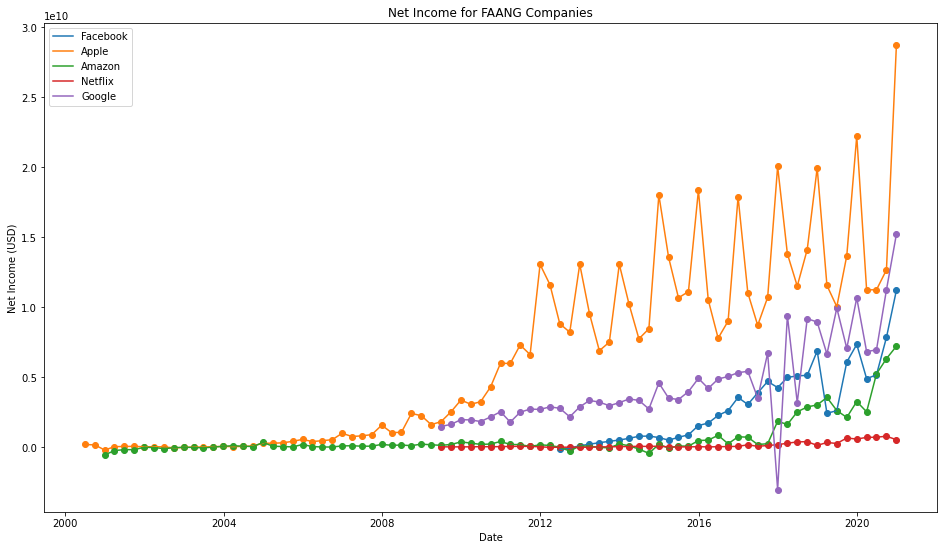

In [11]:
plt.figure(figsize=(16,9))

ticker_dict = {"FB":"Facebook",
                "AAPL":"Apple",
                "AMZN":"Amazon",
                "NFLX":"Netflix",
                "GOOG":"Google"}

for key, val in ticker_dict.items():
    plt.plot(quarterly_data.loc[key].index, quarterly_data.loc[key]['Net Income (Common)'], label=val)
    plt.scatter(quarterly_data.loc[key].index, quarterly_data.loc[key]['Net Income (Common)'])
plt.xlabel("Date")
plt.ylabel("Net Income (USD)")
plt.title("Net Income for FAANG Companies")
plt.legend()
plt.show()

We can search these time series for trends, seasonality, irregularity and cyclic behavior with some analysis.


In [12]:
ticker = input("Select a Ticker: ")
attribute ="Net Income"

Select a Ticker: AAPL


In [13]:
rolmean = quarterly_data.loc[ticker][attribute].rolling(4).mean()
rolstd = quarterly_data.loc[ticker][attribute].rolling(4).std()

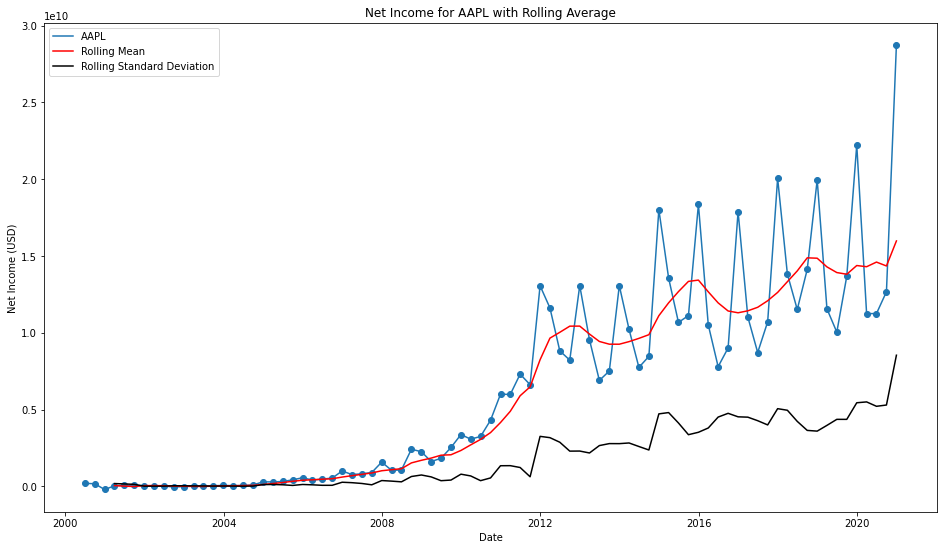

In [14]:
plt.figure(figsize=(16,9))
# Verifying the time series is not stationary with moving average and standard deviation

plt.plot(quarterly_data.loc[ticker].index, quarterly_data.loc[ticker][attribute], label=ticker)
plt.plot(rolmean, color = "red", label = 'Rolling Mean' )
plt.plot(rolstd, color = "black", label = "Rolling Standard Deviation")
plt.scatter(quarterly_data.loc[ticker].index, quarterly_data.loc[ticker]['Net Income (Common)'])
plt.xlabel("Date")
plt.ylabel("Net Income (USD)")
plt.title(f"{attribute} for {ticker} with Rolling Average")
plt.legend()
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

def stationary_test(ser, window = 4):
    """Prints out the statistics for time series stationarity"""
    ser = ser.dropna()
    moving_average = ser.rolling(window = window).mean()
    moving_std = ser.rolling(window = window).std()
    
    plt.plot(ser, color = "cornflowerblue",label='Original')
    plt.plot(moving_average, color = 'red', label = 'Rolling Mean')
    plt.plot(moving_std, color = 'grey', label = 'Rolling Standard Deviation')
    plt.legend()
    plt.title("Stationary Test")
    plt.show()
    
    print("Dickey-Fuller Test: \n------------------")
    dftest = adfuller(ser, autolag='AIC')

    dfout = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value','# Lags Used','Number of Observations'])
    for key, val in dftest[4].items():
        dfout['Critical Value: (%s)'%key] = val
    print(dfout)
    

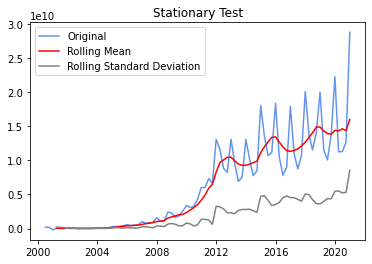

Dickey-Fuller Test: 
------------------
Test Statistic             0.241577
p-value                    0.974499
# Lags Used               12.000000
Number of Observations    70.000000
Critical Value: (1%)      -3.527426
Critical Value: (5%)      -2.903811
Critical Value: (10%)     -2.589320
dtype: float64


In [16]:
stationary_test(quarterly_data.loc[ticker][attribute])

C:\Users\hotal\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


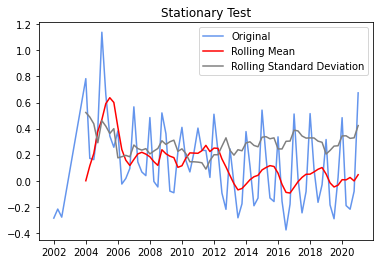

Dickey-Fuller Test: 
------------------
Test Statistic            -3.386629
p-value                    0.011423
# Lags Used                4.000000
Number of Observations    67.000000
Critical Value: (1%)      -3.531955
Critical Value: (5%)      -2.905755
Critical Value: (10%)     -2.590357
dtype: float64


In [17]:
# Flattening the data into a stable time series
log_data = np.log(quarterly_data.loc[ticker][attribute])

log_ma = log_data.rolling(window = 4).mean()

stationary_test(log_data-log_ma)

In [18]:
from statsmodels.tsa.arima.model import ARIMA

In [19]:
# Building an ARIMA model to fit to our data to make predictions

model = ARIMA(quarterly_data.loc[ticker][attribute], order = (2,1,4))
results_AR = model.fit()

C:\Users\hotal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'
C:\Users\hotal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'
C:\Users\hotal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


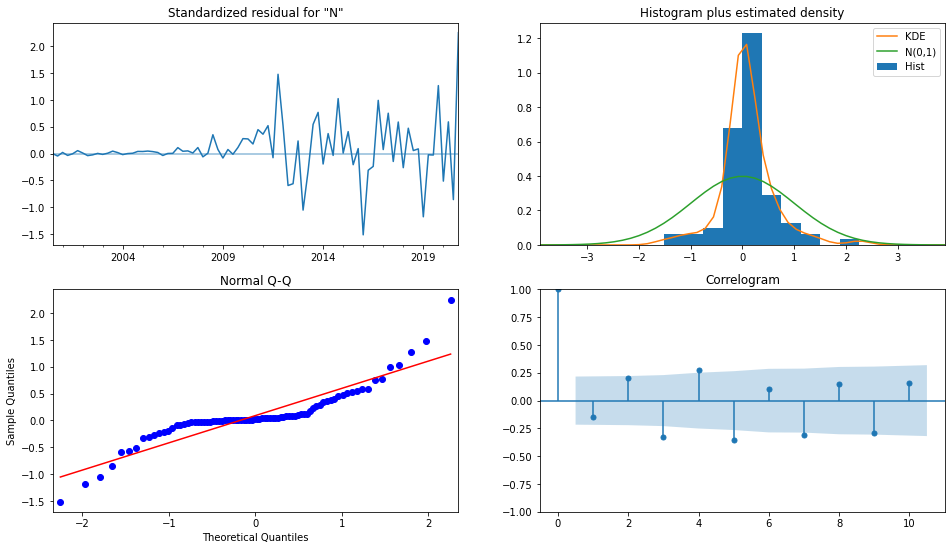

In [20]:
fig = results_AR.plot_diagnostics(figsize = (16,9))

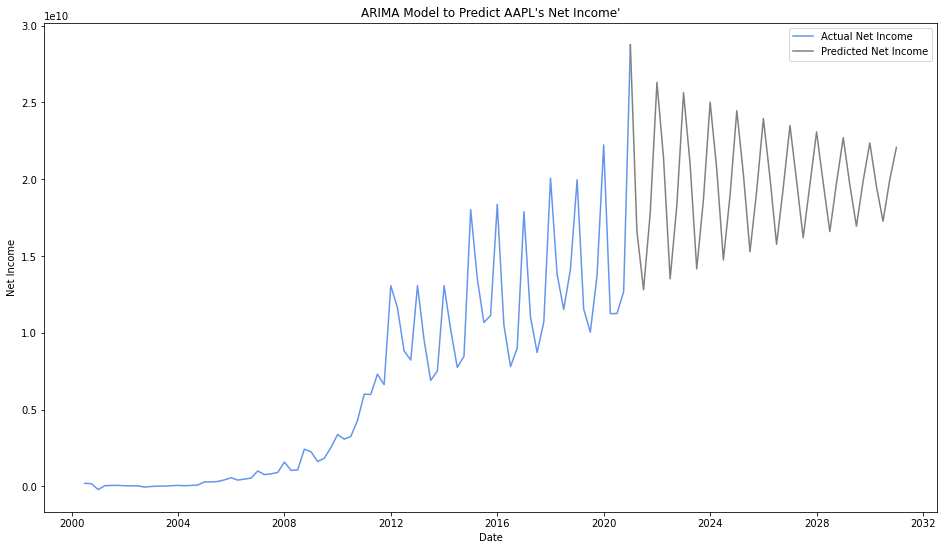

In [21]:
# Plotting the predictions against the real data
data = quarterly_data.loc[ticker][attribute]
predictons = pd.concat([results_AR.forecast(steps=40), quarterly_data.loc[ticker][attribute].tail(1)]).sort_index()
plt.figure(figsize=(16,9))
plt.plot(data, label = f"Actual {attribute}", color = "cornflowerblue")
plt.plot(predictons, label =f"Predicted {attribute}", color = "grey")
plt.title(f"ARIMA Model to Predict {ticker}'s {attribute}'")
plt.xlabel("Date")
plt.ylabel(attribute)
plt.legend()
plt.show()